# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

In [1]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstons Projects/Supervised ML (Regression) - Capstone Project/train_revised.csv')

In [5]:
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
#Shape
dataset.shape

(51645, 10)

Since the target Variable is not provided, So we should have to generate it.

In [7]:
num_of_seats = dataset.groupby(['ride_id'])['seat_number'].count()

In [8]:
num_of_seats = num_of_seats.reset_index().rename(columns= {'seat_number': 'number_of_tickets'})

In [9]:
dataset = dataset.merge(num_of_seats, how='left', on='ride_id')

In [10]:
dataset.shape

(51645, 11)

Now our Data has 11 columns

In [11]:
#getting some information about the variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ride_id            51645 non-null  int64 
 1   seat_number        51645 non-null  object
 2   payment_method     51645 non-null  object
 3   payment_receipt    51645 non-null  object
 4   travel_date        51645 non-null  object
 5   travel_time        51645 non-null  object
 6   travel_from        51645 non-null  object
 7   travel_to          51645 non-null  object
 8   car_type           51645 non-null  object
 9   max_capacity       51645 non-null  int64 
 10  number_of_tickets  51645 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 4.7+ MB


In [12]:
dataset.isna().sum()

ride_id              0
seat_number          0
payment_method       0
payment_receipt      0
travel_date          0
travel_time          0
travel_from          0
travel_to            0
car_type             0
max_capacity         0
number_of_tickets    0
dtype: int64

I remove 'payment_receipt' to find to find duplicated values

In [13]:
dataset = dataset.drop('payment_receipt', axis=1)

In [14]:
dataset.duplicated().sum()

169

In [15]:
dataset = dataset.drop_duplicates()

Since there are No null and duplicate Observations

####**Feature Engineering**

---

I generate two new varibles travel_day, travel_month to identify the traveling time on the monthaly & daily basses.
And i also convert traveling time in hours to minutes.


*   After creating travel_month and travel_day i drop travel_date.




In [16]:
dataset['travel_month'] = dataset['travel_date'].apply(lambda x: pd.Timestamp(x).month_name())

In [17]:
dataset['travel_day'] = dataset['travel_date'].apply(lambda x: pd.Timestamp(x).day_name())

In [18]:
def hr_to_min(x):
  date = pd.Timestamp(x)
  hm = date.hour*60
  min = date.minute
  total_min = hm + min
  return total_min

In [19]:
dataset['travel_time'] = dataset['travel_time'].apply(lambda x: hr_to_min(x))

In [20]:
dataset = dataset.drop(['travel_date'], axis=1)

In [21]:
dataset.head()

,ride_id,seat_number,payment_method,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,travel_month,travel_day
0,1442,15A,Mpesa,435,Migori,Nairobi,Bus,49,1,October,Tuesday
1,5437,14A,Mpesa,432,Migori,Nairobi,Bus,49,1,November,Sunday
2,5710,8B,Mpesa,425,Keroka,Nairobi,Bus,49,1,November,Sunday
3,5777,19A,Mpesa,430,Homa Bay,Nairobi,Bus,49,5,November,Monday
4,5778,11A,Mpesa,432,Migori,Nairobi,Bus,49,31,November,Monday


In [22]:
dataset['travel_time'] = dataset['travel_time'].apply(lambda x: 'Morning' if x < 720 else ('Afternoon' if x < 960 else 'Evening'))

#### description of the Data

In [23]:
dataset.describe(include='all')

,ride_id,seat_number,payment_method,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,travel_month,travel_day
count,51476.000000,51476,51476,51476,51476,51476,51476,51476.000000,51476.000000,51476,51476
unique,NaN,61,2,2,17,1,2,NaN,NaN,12,7
top,NaN,1,Mpesa,Morning,Kisii,Nairobi,Bus,NaN,NaN,December,Wednesday
freq,NaN,2064,51364,46623,22587,51476,31835,NaN,NaN,9498,8233
mean,10187.614655,NaN,NaN,NaN,NaN,NaN,NaN,34.500855,17.274011,NaN,NaN
std,2211.273736,NaN,NaN,NaN,NaN,NaN,NaN,18.459386,12.380067,NaN,NaN
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000,NaN,NaN
25%,8280.750000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,9.000000,NaN,NaN
50%,10352.000000,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,11.000000,NaN,NaN
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,26.000000,NaN,NaN


####Examin the Data Distribution of target Variable

In [25]:
target_var = dataset['number_of_tickets']

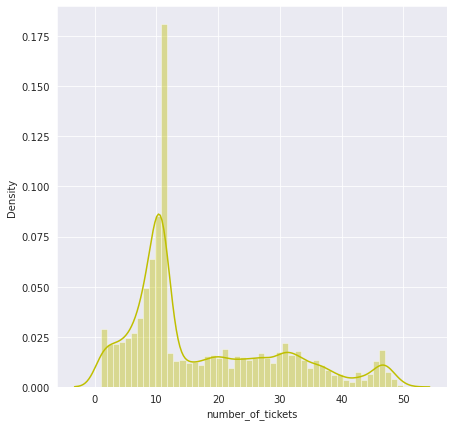

In [26]:
plt.figure(figsize=(7,7))
sns.distplot(target_var, color='y')
plt.show()